# NYC Green Taxi Data analysis
By:
<br>
Manan Vasani
<br>
Duke University

Importing all necessary librabries that would be required for data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
from scipy import stats
import time
from dateutil.parser import parse
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.metrics as skm

In [3]:
data = pd.read_csv('green_tripdata_2015-09.csv')

In [4]:
df = pd.DataFrame(data)

To visualize all the cloumns present in the data I need to change the display settings

In [5]:
pd.set_option("display.max_columns",999)

In [6]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [8]:
df.shape

(1494926, 21)

## Question 1
Question 1

·         Programmatically download and load into your favorite analytical tool the trip data for September 2015.

·         Report how many rows and columns of data you have loaded.

Number of Rows: 1494926 
<br>
Number of columns: 21

 Checking whether the dataset contains null value or not

In [9]:
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

Dropping the column Ehail_fee as it is empty

In [10]:
df.drop('Ehail_fee',axis=1,inplace=True)

# Question 2

·Plot a histogram of the number of the trip distance ("Trip Distance").

·Report any structure you find and any hypotheses you have about that structure.

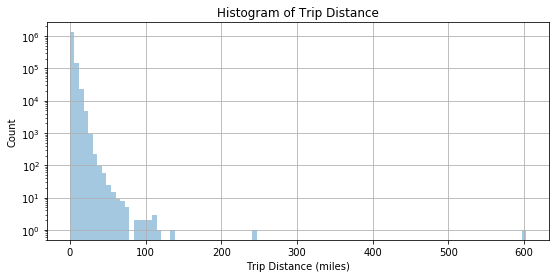

In [11]:
fig,ax = plt.subplots(1,1,figsize = (9,4))
plt.grid()
sns.distplot(df['Trip_distance'],bins=100,kde=False)
ax.set_xlabel('Trip Distance (miles)')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_title('Histogram of Trip Distance')
plt.savefig('Histogram of Trip Distance with outliers')

We see that most trips are 0 to 100 miles. However there are outliers present in dataset as we see trips that are 600 miles in length. This might be due to some error in reading meter because logically a trip of more than 500 miles would eventually take one to Quebec,Canada if traveling north, Detroit if going east and Charlotte, NC if one plnas to drive south. 

Hence to nullify the effect of these outliers and get more accurate plot of trip duration I remove trip distance entries that lie beyond 3 standard deviations of the mean. To do so I calculate the z-score of each datapoint and eliminate outliers whose z-score for trip distance is more than 3. 

In [12]:
df['z']=stats.zscore(df['Trip_distance'])

In [13]:
df2 = df[df['z']<=3]

In [14]:
df2['Trip_distance'].mean()

2.7047646844515167

In [15]:
df2['Trip_distance'].median()

1.92

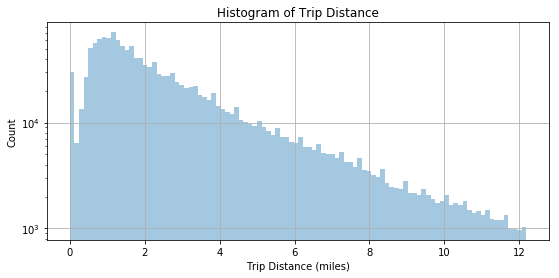

In [16]:
fig,ax = plt.subplots(1,1,figsize = (9,4))
plt.grid()
sns.distplot(df2['Trip_distance'],bins=100,kde=False)
ax.set_xlabel('Trip Distance (miles)')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_title('Histogram of Trip Distance')
plt.savefig('Histogram of Trip Distance without outliers')

The data now makes sense as maximum length of a trip is slightly more than 12 miles. We see that most trips are less than 5 miles with a mean distance of 2.7 and median of 1.92 miles.

# Question 3
•Report mean and median trip distance grouped by hour of day.
<br>
<br>
•We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting  characteristics of these trips.


### Solution
Reading the data dictionary tells us that trips with RatecodeID of 2(relating to JFK) and 3(Relating to Newark) are trip that are either to or from these airports.
<br>
Hence I create a new variable within the dataframe called 'Airport_trip' which would be 1 if the trip is originating/terminating at airports else 0.

I also create variables such as Trip speed, trip duration, day of the week,etc that would help to better analyse and visualize the data.

In [17]:
df['Pickup_dt'] = df.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
df['Dropoff_dt'] = df.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [18]:
df['Pickup_hour'] = df.Pickup_dt.apply(lambda x:x.hour)

In [19]:
df['Pickup_day'] = df['Pickup_dt'].apply(lambda x : x.day)

In [20]:
df['Tip_percent'] = df['Tip_amount']/df['Total_amount'] *100

In [21]:
days={1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun',7:'Mon',
      8:'Tue',9:'Wed',10:'Thurs',11:'Fri',12:'Sat',13:'Sun',14:'Mon',
      15:'Tue',16:'Wed',17:'Thurs',18:'Fri',19:'Sat',20:'Sun',21:'Mon',
      22:'Tue',23:'Wed',24:'Thurs',25:'Fri',26:'Sat',27:'Sun',28:'Mon',
      29:'Tue',30:'Wed'}

In [22]:
df['Pickup_day_name']=df['Pickup_day'].map(days)

In [23]:
ty ={'Mon':'Weekday','Tue':'Weekday','Wed':'Weekday','Thurs':'Weekday','Fri':'Weekday','Sat':'Weekend','Sun':'Weekend'}

In [24]:
df['Pick_Day_type']=df['Pickup_day_name'].map(ty)

In [25]:
df['Airport_trips'] = df['RateCodeID'].apply(lambda x : 1 if( (x==2)|(x==3)) else 0)

In [26]:
df['Trip_duration'] = df['Dropoff_dt'] - df['Pickup_dt']

In [27]:
df['Trip_duration']= df['Trip_duration'].apply(lambda x : x.total_seconds()/3600)                                      

In [28]:
df['Speed'] = df['Trip_distance']/df['Trip_duration']

Trip durations of less than 120 seconds seems hard to believe. Hence I drop the corresponding values.

In [29]:
#Assuming a trip has to last more than 2 mins
i = df[df['Trip_duration']<=0.034].index
df.drop(i,inplace=True)

Since the speed linit in NYC is 50 mph, we drop records where speed is less than 1mph and greater than 70mph

In [30]:
j = df[(df['Speed']<1)|(df['Speed']>70)].index
df.drop(j,inplace=True)

Creating a new dataframe that has data of only airport related trips

In [31]:
df_airport_trips = df[(df['RateCodeID']==2) | (df['RateCodeID']==3)]

In [32]:
df['Airport_trips'].value_counts()

0    1429224
1       3249
Name: Airport_trips, dtype: int64

##### 5552 trips that originate or terminate at one of NYC airports

Creating a pivot table to store mean and median values of trip distance according to hour of day.

In [33]:
table1 = df.pivot_table(index='Pickup_hour', values='Trip_distance',aggfunc=('mean','median')).reset_index()

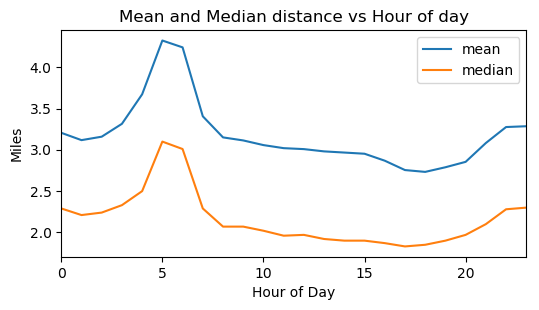

In [34]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100)
table1[['mean','median']].plot(ax=ax)
ax.set_ylabel('Miles')
ax.set_xlabel('Hour of Day')
ax.set_title('Mean and Median distance vs Hour of day')
plt.savefig('Mean and Median distance vs Hour of day')

In [35]:
table1

,Pickup_hour,mean,median
0,0,3.206316,2.29
1,1,3.117672,2.21
2,2,3.159469,2.24
3,3,3.315467,2.33
4,4,3.673129,2.50
5,5,4.324501,3.10
6,6,4.241436,3.01
7,7,3.406558,2.29
8,8,3.150904,2.07
9,9,3.114036,2.07


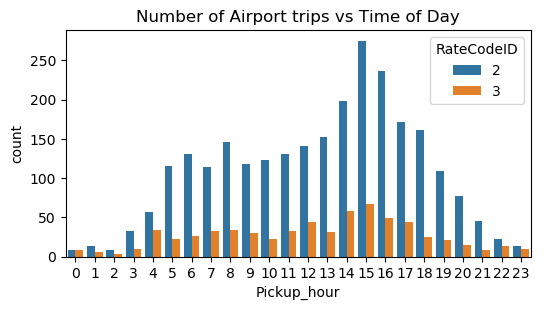

In [36]:
fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100)
sns.countplot(x='Pickup_hour',data=df_airport_trips,hue='RateCodeID')
plt.title('Number of Airport trips vs Time of Day')
plt.savefig('Number of Airport trips vs Time of Day')

In [37]:
table2=df_airport_trips.pivot_table(index=['RateCodeID','Pickup_hour'],values=['Trip_distance','Tip_amount','Total_amount','Tip_percent']).reset_index()

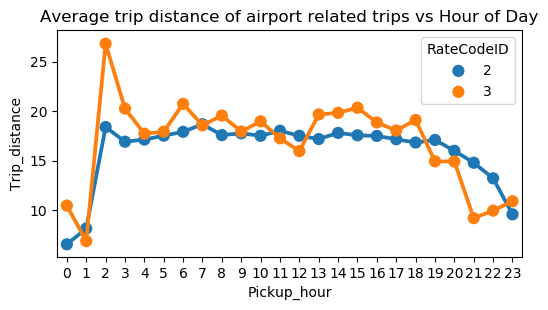

In [38]:
fig = plt.figure(figsize=(6,3),dpi=100)
sns.pointplot(x='Pickup_hour',y='Trip_distance',data=table2,hue='RateCodeID')
plt.title('Average trip distance of airport related trips vs Hour of Day')
plt.savefig('Average trip distance of airport related trips vs Hour of Day')

In [39]:
grp_airport = df_airport_trips.set_index(['Pick_Day_type','Pickup_day_name','Pickup_hour'])

Creating a dataframe where data is grouped according to weekdays and weekends

In [40]:
grp_airport_weekday = grp_airport.xs('Weekday').reset_index()

In [41]:
grp_airport_weekend = grp_airport.xs('Weekend').reset_index()

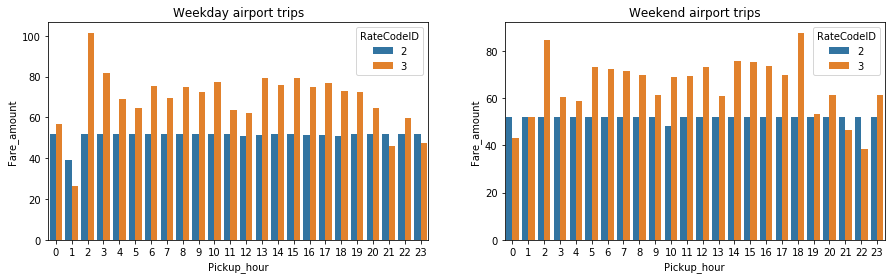

In [42]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour',y='Fare_amount',data=grp_airport_weekday,ci=None,hue='RateCodeID')
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Weekday airport trips')
plt.title('Weekday airport trips')

plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour',y='Fare_amount',data=grp_airport_weekend,ci=None,hue='RateCodeID')
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')
ax[1].set_title('Weekend aiport trips')
plt.title('Weekend airport trips')
plt.savefig('Weekend airport trips fare')

In [43]:
df_airport_trips['Fare_amount'][df_airport_trips['RateCodeID']==2].mean()

51.74009996155325

In [44]:
df_airport_trips['Fare_amount'][df_airport_trips['RateCodeID']==3].mean()

70.44135802469135

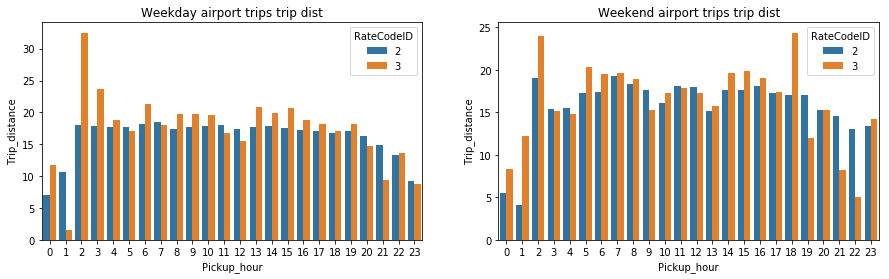

In [45]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour',y='Trip_distance',data=grp_airport_weekday,ci=None,hue='RateCodeID')
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Weekday airport trips')
plt.title('Weekday airport trips trip dist')

plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour',y='Trip_distance',data=grp_airport_weekend,ci=None,hue='RateCodeID')
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')
ax[1].set_title('Weekend aiport trips')
plt.title('Weekend airport trips trip dist')
plt.savefig('day wise airport trip dist hue')

# Question 4
•Build a derived variable for tip as a percentage of the total fare.
<br>
<br>
•Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

Before diving deep into what factors affect tip percent lets just have  a look at the tipping behaviour during week 
<br>
days and at weekend

In [46]:
grp2 = df.set_index(['Pick_Day_type','Pickup_day_name','Pickup_hour'])

In [47]:
weekday = grp2.xs('Weekday').reset_index()

In [48]:
weekend = grp2.xs('Weekend').reset_index()

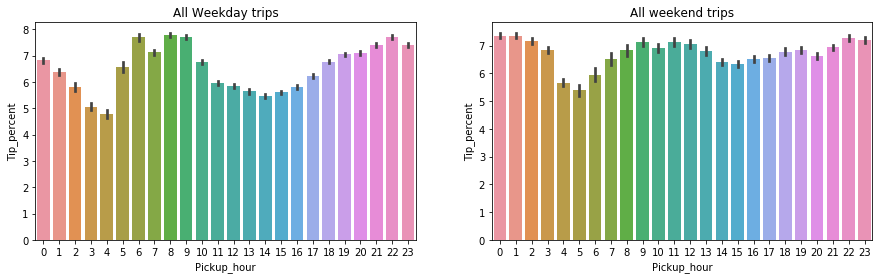

In [49]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=weekday)
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Weekday')
plt.title('All Weekday trips')

plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=weekend)
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')
ax[1].set_title('Weekend')
plt.title('All weekend trips')
plt.savefig('All Weekend trip tip')


Before Cleaning our data and building our model drop the Tip percent column created for EDA. It will be again
<br>
created after entire dataset is cleaned.

In [50]:
df.drop('Tip_percent',axis=1,inplace=True)

## Data Cleaning

Checking for any null values and replacing those with its median/mean values

In [51]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
z                        0
Pickup_dt                0
Dropoff_dt               0
Pickup_hour              0
Pickup_day               0
Pickup_day_name          0
Pick_Day_type            0
Airport_trips            0
Trip_duration            0
Speed                    0
dtype: int64

In [52]:
l = len(df)

### Analysing each column for any anamolous data

#### EDA

1. The latitude bound of NYC is (40.63, 40.85) and the longitude bound is (-74.03, -73.75).Thus it makes sense to check whether our data is restricted within this limit or not. Also it is seen that numerous latitude and longitude values are 0. The only logical reasoning behind this would be that the device was unable to make an entry into the system because latitude = 0 means a pickup from some place on equator which is impossible.
<br>
<br>
2. A number passenger count's are 0 which does not makes sense, unless the driver charges himself/herself for the trip. Hence replacing 0 count with median value.
<br>
<br>
3. Reading the rules and regulations on TLC website, it becomes clear that the minimum fare amount for a taxi ride is 2.5 .Any value below this is replaed by the median value.
<br>
<br>
4. Similary various other data such as Tip amount, Toll amount, Trip Distance,etc could be negative. Hence converted those to its absolute values and replaced others with the median/mean value.

<ln>

In [53]:
#### 1. Latitude and Longitude
ind = df[(df['Pickup_latitude']<40.63) | (df['Pickup_latitude']>40.85) | 
         (df['Dropoff_latitude']<40.63) | (df['Dropoff_latitude']>40.85)].index
temp_df1 = df.drop(ind)

ind1 = temp_df1[(temp_df1['Pickup_longitude']<-74.03) | (temp_df1['Pickup_longitude']>-73.75) | 
         (temp_df1['Dropoff_longitude']<-74.03) | (temp_df1['Dropoff_longitude']>-73.75)].index
temp_df2 = temp_df1.drop(ind1)

print('Dropped',100*len(ind)/l,'% from latitude columns')
print('Dropped',100*len(ind1)/l,'% from longitude columns')


#### 2. VendorID
i = temp_df2[(temp_df2['VendorID']!=1)&(temp_df2['VendorID']!=2)].index
temp_df2.loc[i,'VendorID'] = temp_df2['VendorID'].median()
print('Replaced', 100 * len(i)/l,'% in VendorID Column')


#### 3. Store_and_fwd_flag
i = temp_df2[(temp_df2['Store_and_fwd_flag']!='Y')&(temp_df2['Store_and_fwd_flag']!='N')].index
temp_df2.loc[i,'Store_and_fwd_flag'] = 'N'
print('Replaced', 100 * len(i)/l,'% in Store_and_fwd_flag Column')


#### 4. RateCodeID
i = temp_df2[(temp_df2['RateCodeID']<1)|(temp_df2['RateCodeID']>6)].index
temp_df2.loc[i,'RateCodeID'] = temp_df2['RateCodeID'].median()
print('Replaced', 100 * len(i)/l,'% in RateCodeID Column')

#### 5. Passenger count
i = temp_df2[(temp_df2['Passenger_count']<=0)].index
temp_df2.loc[i,'Passenger_count'] = temp_df2['Passenger_count'].median()
print('Replaced', 100 * len(i)/l,'% in Passenger_count Column')

#### 6. Extra
ind3 = temp_df2[~((temp_df2['Extra']==0) | (temp_df2['Extra']==0.5) | (temp_df2['Extra']==1))].index
temp_df2.loc[ind3, 'Extra'] = 0
print('Replaced',100*len(i)/l,'% in Extra Column')

#### 7. Improvement Surcharge
i = temp_df2[(temp_df2['improvement_surcharge']<0)].index
temp_df2.loc[i,'improvement_surcharge'] = temp_df2['improvement_surcharge'].median()
print('Replaced', 100 * len(i)/l,'% in improvement_surcharge Column')

#### 8. MTA tax
i = temp_df2[(temp_df2['MTA_tax']<0)].index
temp_df2.loc[i,'MTA_tax'] = temp_df2['MTA_tax'].median()
print('Replaced', 100 * len(i)/l,'% in MTA_tax Column')

#### 9. Tolls Amount
i = temp_df2[(temp_df2['Tolls_amount']<0)].index
temp_df2.loc[i,'Tolls_amount'] = temp_df2['Tolls_amount'].median()
print('Replaced', 100 * len(i)/l,'% in Tolls_amount Column')

#### 10. Payment type
i = temp_df2[(temp_df2['Payment_type']<1)|(temp_df2['Payment_type']>5)].index
temp_df2.loc[i,'Payment_type'] = temp_df2['Payment_type'].median()
print('Replaced', 100 * len(i)/l,'% in Payment_type Column')

#### 11. Trip type
i = temp_df2[~((temp_df2['Trip_type ']==1)|(temp_df2['Trip_type ']==2))].index
temp_df2.loc[i,'Trip_type '] = temp_df2['Trip_type '].median()
print('Replaced', 100 * len(i)/l,'% in Payment_type Column')

#### 12. Fare Amount
temp_df2['Fare_amount']=temp_df2['Fare_amount'].apply(lambda x : np.abs(x) if x<0 else x)
i = temp_df2[temp_df2['Fare_amount']<=2.5].index
temp_df2.loc[i,'Fare_amount'] = temp_df2['Fare_amount'].median()
print('Replaced', 100 * len(i)/l,'% in Fare_amount Column')

#### 13. Trip Distance
i = temp_df2[temp_df2['Trip_distance']<=0].index
temp_df2.loc[i,'Trip_distance'] = temp_df2['Trip_distance'].median()
print('Replaced', 100 * len(i)/l,'% in Trip_distance Column')

#### 14. Tip Amount
i = temp_df2[temp_df2['Tip_amount']<0].index
temp_df2.loc[i,'Tip_amount'] = temp_df2['Tip_amount'].median()
print('Replaced', 100 * len(i)/l,'% in Tip_amount Column')


Dropped 6.293870809432359 % from latitude columns
Dropped 0.3632878246221744 % from longitude columns
Replaced 0.0 % in VendorID Column
Replaced 0.0 % in Store_and_fwd_flag Column
Replaced 0.0 % in RateCodeID Column
Replaced 0.010401592211511141 % in Passenger_count Column
Replaced 0.010401592211511141 % in Extra Column
Replaced 0.0560569029922379 % in improvement_surcharge Column
Replaced 0.055847474961133646 % in MTA_tax Column
Replaced 6.980934370141705e-05 % in Tolls_amount Column
Replaced 0.0 % in Payment_type Column
Replaced 0.0 % in Payment_type Column
Replaced 0.17878172921932908 % in Fare_amount Column
Replaced 0.0 % in Trip_distance Column
Replaced 6.980934370141705e-05 % in Tip_amount Column


In [54]:
temp_df2['Cal_amount'] = temp_df2['Fare_amount'] + temp_df2['Tip_amount'] + temp_df2['Extra'] + temp_df2['MTA_tax'] + temp_df2['improvement_surcharge'] + temp_df2['Tolls_amount']

In [55]:
temp_df2[['Total_amount','Cal_amount']].corr()

,Total_amount,Cal_amount
Total_amount,1.000000,0.997133
Cal_amount,0.997133,1.000000


We see that the calculated amount and the total amount given in dataset are highly correlated. 
<br>
Hence we can drop Total amout column that contains erroneous data.

Also I create the terget variable Tip Percent out of cleaned data.

In [56]:
temp_df2['Tip_percent'] = temp_df2['Tip_amount']/temp_df2['Cal_amount'] *100

In [57]:
temp_df2.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type ', 'z', 'Pickup_dt', 'Dropoff_dt',
       'Pickup_hour', 'Pickup_day', 'Pickup_day_name', 'Pick_Day_type',
       'Airport_trips', 'Trip_duration', 'Speed', 'Cal_amount', 'Tip_percent'],
      dtype='object')

Droppping unnecessary columns.

In [58]:
df_raw = temp_df2.drop(['lpep_pickup_datetime', 'Lpep_dropoff_datetime','z','Pickup_day','Pick_Day_type','Total_amount'],axis=1)

In [59]:
df_raw.shape

(1337111, 26)

In [60]:
df_raw.head()

,VendorID,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Payment_type,Trip_type,Pickup_dt,Dropoff_dt,Pickup_hour,Pickup_day_name,Airport_trips,Trip_duration,Speed,Cal_amount,Tip_percent
2,2.0,N,1.0,-73.921410,40.766708,-73.914413,40.764687,1.0,0.59,4.0,0.5,0.5,0.50,0.0,0.3,1.0,1.0,2015-09-01 00:01:50,2015-09-01 00:04:24,0,Tue,0,0.042778,13.792208,5.80,8.620690
3,2.0,N,1.0,-73.921387,40.766678,-73.931427,40.771584,1.0,0.74,5.0,0.5,0.5,0.00,0.0,0.3,2.0,1.0,2015-09-01 00:02:36,2015-09-01 00:06:42,0,Tue,0,0.068333,10.829268,6.30,0.000000
4,2.0,N,1.0,-73.955482,40.714046,-73.944412,40.714729,1.0,0.61,5.0,0.5,0.5,0.00,0.0,0.3,2.0,1.0,2015-09-01 00:00:14,2015-09-01 00:04:20,0,Tue,0,0.068333,8.926829,6.30,0.000000
5,2.0,N,1.0,-73.945297,40.808186,-73.937668,40.821198,1.0,1.07,5.5,0.5,0.5,1.36,0.0,0.3,1.0,1.0,2015-09-01 00:00:39,2015-09-01 00:05:20,0,Tue,0,0.078056,13.708185,8.16,16.666667
6,2.0,N,1.0,-73.890877,40.746426,-73.876923,40.756306,1.0,1.43,6.5,0.5,0.5,0.00,0.0,0.3,1.0,1.0,2015-09-01 00:00:52,2015-09-01 00:05:50,0,Tue,0,0.082778,17.275168,7.80,0.000000


Before building a model to predict amount of tip, lets see how many transactions involve a tip being paid

In [61]:
df['Tip_percentage'] = df['Tip_amount']/df['Total_amount'] * 100

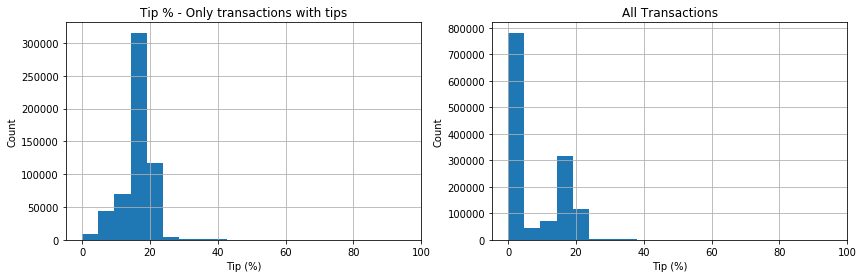

In [62]:
data1 = df_raw[df_raw['Tip_percent']>0]
fig,ax=plt.subplots(1,2,figsize=(14,4))
data1.Tip_percent.hist(bins = 20,ax=ax[0])
ax[0].set_xlabel('Tip (%)')
ax[0].set_ylabel('Count')
ax[0].set_title('Tip % - Only transactions with tips')

df_raw.Tip_percent.hist(bins = 20,ax=ax[1])
ax[1].set_xlabel('Tip (%)')
ax[1].set_title('All Transactions')
ax[1].set_ylabel('Count')
plt.savefig('All Transactions')

In [63]:
df_raw['Tip_percent'][df_raw['Tip_percent']>0].mean()

16.310603883777627

Learning how Tip percent varies with hour of Day

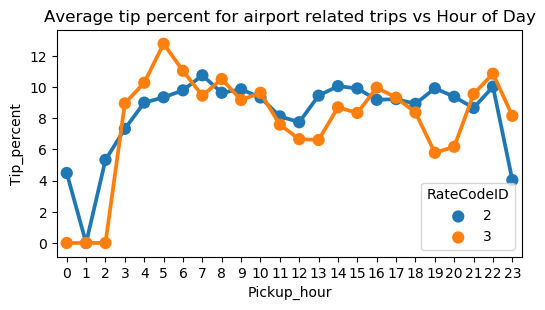

In [64]:
fig = plt.figure(figsize=(6,3),dpi=100)
sns.pointplot(x='Pickup_hour',y='Tip_percent',data=table2,hue='RateCodeID')
plt.title('Average tip percent for airport related trips vs Hour of Day')
plt.savefig('Average tip percent for airport related trips vs Hour of Day')

Understanding tipping behaviour when it is an airport trip and whether it is on a week day or weekend

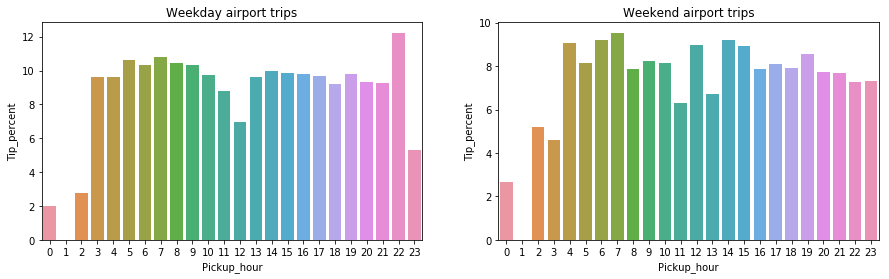

In [65]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=grp_airport_weekday,ci=None)
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Weekday airport trips')
plt.title('Weekday airport trips')

plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=grp_airport_weekend,ci=None)
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')
ax[1].set_title('Weekend aiport trips')
plt.title('Weekend airport trips')
plt.savefig('Weekend airport trips tip without hue')

Understanding tipping behaviour when it is an airport trip and whether it is on a week day or weekend for 
<br>
each airport

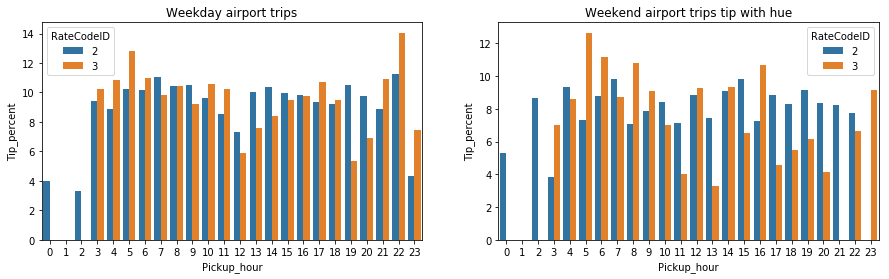

In [66]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=grp_airport_weekday,ci=None,hue='RateCodeID')
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Weekday airport trips')
plt.title('Weekday airport trips')

plt.subplot(1,2,2)
sns.barplot(x='Pickup_hour',y='Tip_percent',data=grp_airport_weekend,ci=None,hue='RateCodeID')
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')
ax[1].set_title('Weekend aiport trips')
plt.title('Weekend airport trips tip with hue')

In [67]:
tb3 = df_raw.pivot_table(index='Pickup_day_name',columns='Pickup_hour',values='Tip_percent')

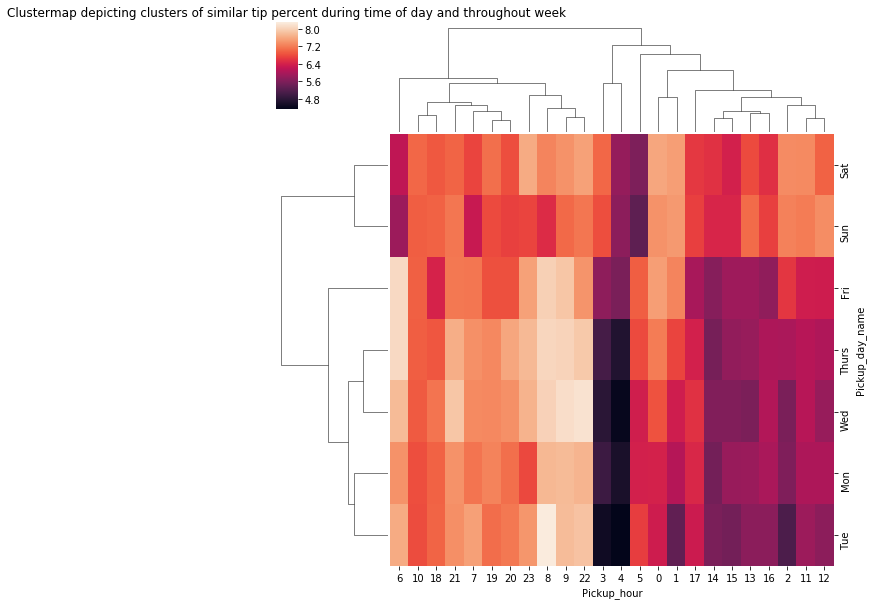

In [68]:
sns.clustermap(tb3)
plt.title('Clustermap depicting clusters of similar tip percent during time of day and throughout week')
plt.savefig('Clustermap')

In [69]:
tb2 = data1.pivot_table(index='Pickup_day_name',columns='Pickup_hour',values='Tip_percent')

Creating the Target Variable which would be 1 if tip is paid else 0

In [70]:
df_raw['Target'] = df_raw['Tip_percent'].apply(lambda x : 1 if x>0 else 0)

In [71]:
df_raw['Target'].value_counts()

0    774412
1    562699
Name: Target, dtype: int64

### Model building
Since such a large proportion of people dont pay tip, I decided to create my model in two parts.
<br>
Part1: Predict whether a tip would be provided or not
Part2: If the transaction is classified as one where tip is provided, predict how much in tip would be paid.

### Part 1

Creating the dataframe with necessary variable to build model

In [72]:
x = df_raw[['Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance',
       'Payment_type', 'Pickup_hour',
       'Trip_duration', 'Speed','Cal_amount','Airport_trips']]

In [73]:
y=df_raw['Target']

Creating seperate train and test sets so as to cross validate the model

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=100)

In [75]:
log1 = LogisticRegression()
log1.fit(x_train,y_train)
y_pred=log1.predict(x_test)
print(skm.roc_auc_score(y_test,y_pred))
print(log1.coef_)

0.971314855395
[[  2.09675710e+00  -7.29060339e-01  -5.06151233e+00  -3.76946116e+00
   -6.68802105e-03  -3.11457839e+00  -4.00216441e+01  -1.19903578e-02
   -3.08469037e+01   2.87769462e-02   1.48275766e+00  -7.85645414e+00]]


In [76]:
skm.confusion_matrix(y_test,y_pred)

array([[369472,  18050],
       [  3033, 278001]], dtype=int64)

Currently our data resides in a DataFrame. But to deal with categorical values we would need to use the one-hot 
<br>
encoding process from the sklearn library which works only on numpy arrays, hence we convert the relevant columns 
<br>
to numpy arrays in further analysis and encode them to one-hot vectors.

In [77]:
X_pre_encode = df_raw['VendorID'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans1 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X_pre_encode = df_raw['Store_and_fwd_flag'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X = np.c_[ans1,ans2]

E:\Python\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
X = np.c_[X , df_raw['Passenger_count'].as_matrix(),df_raw['Trip_distance'].as_matrix(),df_raw['Fare_amount'].as_matrix(),
         df_raw['Extra'].as_matrix(),df_raw['MTA_tax'].as_matrix(),df_raw['Tolls_amount'].as_matrix(),
         df_raw['improvement_surcharge'].as_matrix(), df_raw['Trip_duration'].as_matrix(),df_raw['Speed'].as_matrix(),
         df_raw['Cal_amount'].as_matrix()]

In [79]:
for col in ['Payment_type','Pickup_hour','Airport_trips','RateCodeID','Pickup_day_name']:

    X_pre_encode = df_raw[col].as_matrix()
    le = preprocessing.LabelEncoder()
    le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
    ans = le.transform(X_pre_encode)

    enc = OneHotEncoder()
    enc.fit(ans.reshape(X_pre_encode.shape[0],1))
    ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()
    X = np.c_[X,ans2]

E:\Python\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shape of array after onehot encoding

In [80]:
X.shape

(1337111, 58)

In [81]:
Y = df_raw['Tip_percent'].as_matrix()

Again creating train and test sets to cross validate the model

In [82]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,Y,test_size=0.5,random_state=100)

In [83]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train3, y_train3)
# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [ -1.87728857e+07  -1.87728858e+07  -1.87461848e+10  -1.87461848e+10
   2.51030959e-02  -1.04264382e-01  -2.44639155e+00  -2.52527750e+00
  -1.48437785e+00  -2.50657749e+00  -3.61211921e+00   5.20506740e-01
   2.27355957e-02   2.23757935e+00  -6.67505394e+07  -6.67505485e+07
  -6.67505487e+07  -6.67505487e+07  -6.67505475e+07   4.04015730e+07
   4.04015730e+07   4.04015731e+07   4.04015730e+07   4.04015729e+07
   4.04015727e+07   4.04015726e+07   4.04015726e+07   4.04015727e+07
   4.04015728e+07   4.04015729e+07   4.04015729e+07   4.04015729e+07
   4.04015729e+07   4.04015729e+07   4.04015729e+07   4.04015729e+07
   4.04015730e+07   4.04015731e+07   4.04015731e+07   4.04015731e+07
   4.04015731e+07   4.04015732e+07   4.04015731e+07   2.86456427e+08
   1.91676137e+08   1.57230161e+07   1.10503305e+08   1.10503307e+08
   1.57230156e+07   1.57230161e+07   1.57230152e+07   5.84128591e+07
   5.84128592e+07   5.84128592e+07   5.84128592e+07   5.84128591e+07
   5.84128591e+07 

In [84]:
y_pred3 = regr.predict(x_test3)
# The mean squared error
skm.mean_squared_error(y_test3,y_pred3)

13.6469128444832

In [85]:
skm.explained_variance_score(y_test3,y_pred3)
# Explained variance score: 1 is perfect prediction

0.81657073910975753

# Question 5
Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. 
<br>
Please select the question that you feel best suits your particular skills and/or expertise. If you answer more 
<br>
than one, only the first will be scored.
Option A: Distributions
<br>
-Build a derived variable representing the average speed over the course of a trip.
<br>
-Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? 
<br>
If you decide they are not the same, can you form a hypothesis regarding why they differ?
<br>
-Can you build up a hypothesis of average trip speed as a function of time of day?

I have already created a feature of speed for model building. Here I create a dataframe where speed is within 
<br>
permissible limits

In [86]:
speed = df_raw[(df_raw['Speed']>=1) & (df_raw['Speed'] <= 70)]

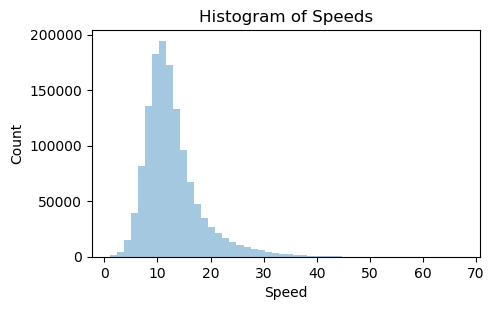

In [87]:
plt.figure(figsize=(5,3),dpi=100)
sns.distplot(speed['Speed'],bins=50,kde=False)
plt.ylabel('Count')
plt.title('Histogram of Speeds')
plt.savefig('Histogram of Speeds')

Creating a new column to indicate which week of month it is

In [88]:
speed['Week'] = speed['Pickup_dt'].apply(lambda x: x.week)

In [89]:
week ={36:1,37:2,38:3,39:4,40:5,}

In [90]:
speed['Week'] = speed['Week'].map(week)

In [91]:
speed.head()

,VendorID,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Payment_type,Trip_type,Pickup_dt,Dropoff_dt,Pickup_hour,Pickup_day_name,Airport_trips,Trip_duration,Speed,Cal_amount,Tip_percent,Target,Week
2,2.0,N,1.0,-73.921410,40.766708,-73.914413,40.764687,1.0,0.59,4.0,0.5,0.5,0.50,0.0,0.3,1.0,1.0,2015-09-01 00:01:50,2015-09-01 00:04:24,0,Tue,0,0.042778,13.792208,5.80,8.620690,1,1
3,2.0,N,1.0,-73.921387,40.766678,-73.931427,40.771584,1.0,0.74,5.0,0.5,0.5,0.00,0.0,0.3,2.0,1.0,2015-09-01 00:02:36,2015-09-01 00:06:42,0,Tue,0,0.068333,10.829268,6.30,0.000000,0,1
4,2.0,N,1.0,-73.955482,40.714046,-73.944412,40.714729,1.0,0.61,5.0,0.5,0.5,0.00,0.0,0.3,2.0,1.0,2015-09-01 00:00:14,2015-09-01 00:04:20,0,Tue,0,0.068333,8.926829,6.30,0.000000,0,1
5,2.0,N,1.0,-73.945297,40.808186,-73.937668,40.821198,1.0,1.07,5.5,0.5,0.5,1.36,0.0,0.3,1.0,1.0,2015-09-01 00:00:39,2015-09-01 00:05:20,0,Tue,0,0.078056,13.708185,8.16,16.666667,1,1
6,2.0,N,1.0,-73.890877,40.746426,-73.876923,40.756306,1.0,1.43,6.5,0.5,0.5,0.00,0.0,0.3,1.0,1.0,2015-09-01 00:00:52,2015-09-01 00:05:50,0,Tue,0,0.082778,17.275168,7.80,0.000000,0,1


In [92]:
f = speed.groupby('Week')

In [93]:
xaxis = [1,2,3,4,5]
avgspd = f['Speed'].mean()

In [94]:
f['Speed'].mean()

Week
1    13.179632
2    12.565661
3    12.566875
4    13.046631
5    12.372110
Name: Speed, dtype: float64

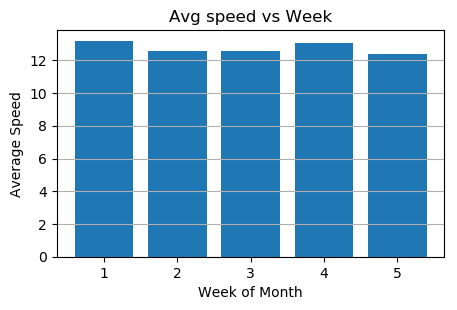

In [95]:
plt.figure(figsize=(5,3),dpi=100)
plt.bar(xaxis,avgspd)
plt.xlabel('Week of Month')
plt.ylabel('Average Speed')
plt.title('Avg speed vs Week')
plt.grid(axis='y')
plt.savefig('Avg speed vs Week')

In [96]:
week_1 = speed['Speed'][speed['Week']==1].as_matrix()
week_2 = speed['Speed'][speed['Week']==2].as_matrix()
week_3 = speed['Speed'][speed['Week']==3].as_matrix()
week_4 = speed['Speed'][speed['Week']==4].as_matrix()
week_5 = speed['Speed'][speed['Week']==5].as_matrix()

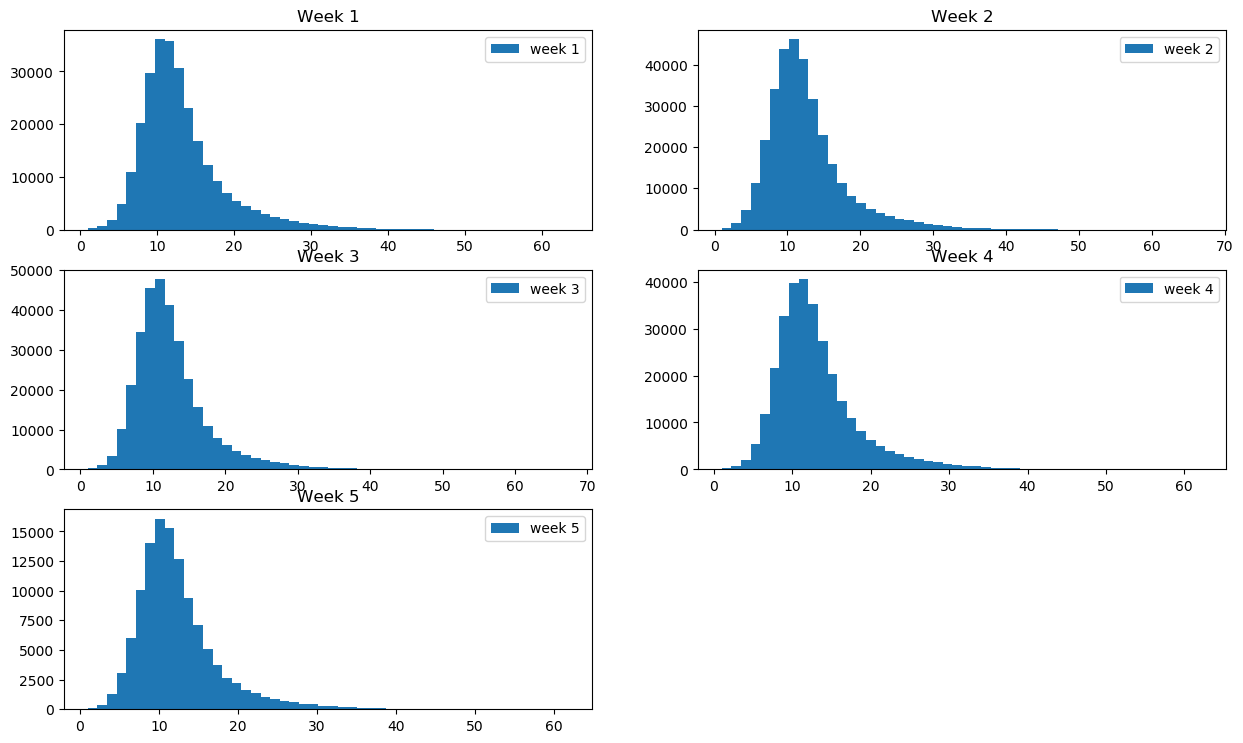

<function matplotlib.pyplot.tight_layout>

In [97]:
plt.figure(figsize=(15,9),dpi=100)
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.title('Week 1')
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.title('Week 2')
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.title('Week 3')
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.title('Week 4')
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.title('Week 5')
plt.savefig('All weeks distance')
plt.show()
plt.tight_layout


In [98]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=1002.9721898951893, pvalue=0.0)

The ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we 
<br>
conclude that the differences between the groups are statistically significant which implies that the week of the 
<br>
month does seem to be related to the average speed. We further compute the mean, median and histogram for these 
<br>
groups to support our claims

In [99]:
group_byhour = speed.groupby('Pickup_hour')
samples = []

for name,group in group_byhour:
    samples.append(group['Speed']) 

In [100]:
stats.f_oneway(samples[0],samples[1],samples[2],samples[3], samples[4],samples[5],samples[6],samples[7],
               samples[8],samples[9],samples[10],samples[11],samples[12],samples[13],samples[14],samples[15],
               samples[16],samples[17],samples[18],samples[19],samples[20],samples[21],samples[22],samples[23])

F_onewayResult(statistic=5401.881835007106, pvalue=0.0)

The ANOVA test for sets partitioned as per the hour of the journey also gives a high f-value and p-value of 0, 
<br>
implying that there are statistifically significant differences in the data sets considered.

Creating a pivot table to store average speed per hour of day for each week

In [101]:
tb4 = speed.pivot_table(index='Pickup_hour',columns='Week',values='Speed')

In [102]:
tb4.columns=[1,2,3,4,5]

In [103]:
tb4 = tb4.reset_index()

In [104]:
tb4.head()

,Pickup_hour,1,2,3,4,5
0,0,14.673254,14.612639,14.039916,14.325455,15.332018
1,1,14.775520,14.715247,14.447156,14.781841,15.354056
2,2,15.125648,14.859193,14.698676,15.084403,15.282465
3,3,15.479006,15.341889,15.251808,15.418755,15.622608
4,4,16.049398,16.089034,15.995391,16.162654,17.631721


E:\Python\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


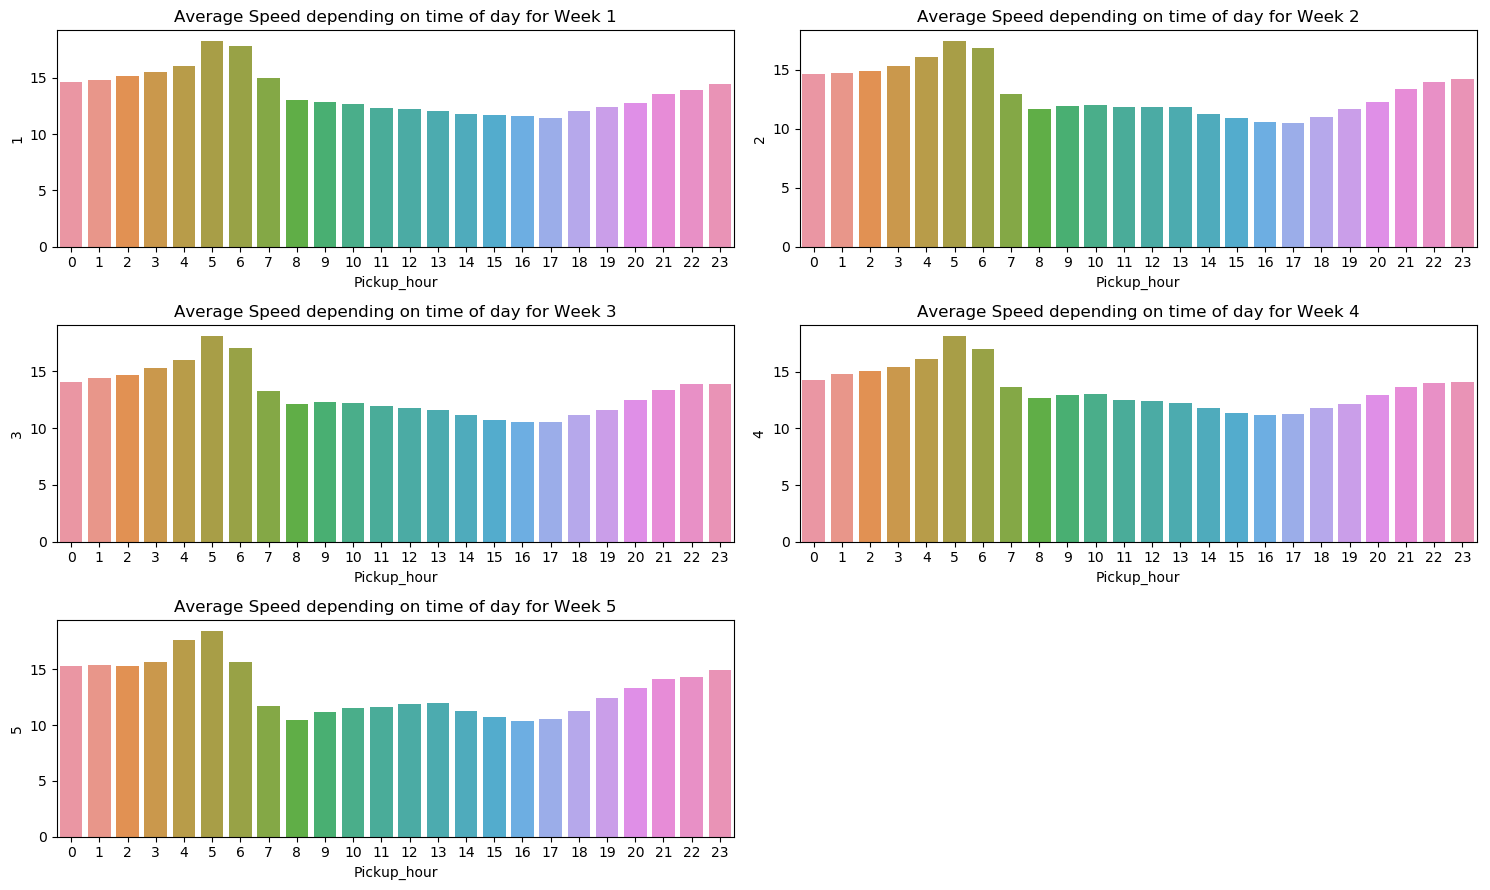

In [105]:
plt.figure(figsize=(15,9),dpi=100)
plt.grid(which='y')
plt.subplot(3,2,1)
sns.barplot(x='Pickup_hour',y=1,data=tb4)
plt.title('Average Speed depending on time of day for Week 1')
plt.legend()
plt.subplot(3,2,2)
sns.barplot(x='Pickup_hour',y=2,data=tb4)
plt.title('Average Speed depending on time of day for Week 2')
plt.subplot(3,2,3)
sns.barplot(x='Pickup_hour',y=3,data=tb4)
plt.title('Average Speed depending on time of day for Week 3')
plt.subplot(3,2,4)
sns.barplot(x='Pickup_hour',y=4,data=tb4)
plt.title('Average Speed depending on time of day for Week 4')
plt.subplot(3,2,5)
sns.barplot(x='Pickup_hour',y=5,data=tb4)
plt.title('Average Speed depending on time of day for Week 5')
plt.savefig('Avg speed per hour for each week')
plt.tight_layout()


This figure makes a lot of sense. As followed by logical thinking average speed at night is more as compared to 
<br>
daytime. This makes sense as during night there is less traffic and fewer people on road. we see a spike in average 
<br>
speed during 4-5 am in the morning and it falls drastically as people get up and get going with their routine. As 
<br>
expected the average speed is lowest in the morning between 8-10 am when people are going to work.  

# Thank You